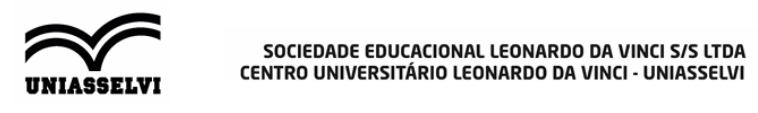

Saint Raymundo de Almeida Melo

4731850

# Projeto I - Aplicação de Métodos de Aprendizagem de Máquina - Etapa I

>## Diagnóstico da Doença de Parkinson


O diagnóstico da doença de Parkinson utilizando machine learning envolve a aplicação de técnicas avançadas de análise de dados para identificar padrões associados à doença. Modelos de aprendizado de máquina, como redes neurais e máquinas de vetores de suporte, são treinados em grandes conjuntos de dados que contêm informações clínicas, biomarcadores e dados de imagem dos pacientes. Esses modelos são capazes de detectar anomalias sutis e variações nos dados que podem indicar a presença de Parkinson em estágios iniciais. Além disso, características como tremores, rigidez muscular e alterações na fala podem ser quantificadas e analisadas. O uso de machine learning pode aumentar a precisão do diagnóstico, reduzir o tempo de detecção e apoiar os profissionais de saúde na tomada de decisões mais informadas. Essa abordagem é promissora para melhorar o tratamento e a gestão da doença, oferecendo um diagnóstico precoce e personalizado.


>## Objetivo


O Projeto I - Aplicação de Métodos de Aprendizagem de Máquina tem por objetivo desenvolver,testar e avaliar modelos de aprendizado de máquina que venham a nos responder se um paciente possui ou não a doença de parkinson

## Especificação Técnica




**Sobre a Base de dados:**

A base de dados escolhida para o desenvolvimento do Projeto I - Aplicação de Métodos de Aprendizagem de Máquina foi parkinsons_disease_data.csv.
Tal base é proveniente do Kaggle e pode ser acessada através do link: https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis/data


Esta base de dados nos traz informações referentes a 2.105 pacientes , subdividas em 6 segmentos:

1 - Informação do Paciente  

2 - Histórico Médico

3 - Medições Clínicas

4 - Avaliações Cognitivas e Funcionais

5 - Sintomas

6 - Informações de Diagnóstico

Nota: Na base de dados original disponível no Kaggle ( link na descrição do tema ) existe um segmento de Informação Confidencial. Porém , ao analisar melhor notamos que o mesmo não terá nenhuma influência em nosso modelo, portanto optamos por retirá lo.



## Descrição das Colunas




Para descrever as colunas presentes na base de dados , primeiramente iremos realizar a importação da biblioteca do python chamada pandas e utilizar a função 'read_csv' para ler a base de dados.

In [40]:
import warnings
import pandas as pd
dataset = pd.read_csv("/content/Dataset/parkinsons_disease_data.csv")
warnings.filterwarnings("ignore")


1 - Infomação do Paciente




In [5]:
dataset.loc[0:4,['PatientID','Age','Gender','Ethnicity','EducationLevel','BMI','Smoking','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality']]

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925


Conforme demonstrado acima , o segmento de informação do paciente possui as seguintes colunas:

**PatientId** - Identificador único atribuído para cada paciente

**Age** - Idade dos pacientes

**Gender** - Gênero dos pacientes, onde 0 significa Masculino e 1 significa Feminino

**Ethnicity** - Etnia dos pacientes seguindo os códigos:

0 - Caucasiano

1 - Afro Americano

2 - Asiático

3 - Outro

**EducationLevel** - Nível de escolaridade dos pacientes seguindo os códigos:

0 - Nenhum

1 - Ensino Médio

2 - Ensino Superior

3 - Nivéis Mais Altos

**BMI** - Índice de massa corporal dos pacientes , valores entre 15 e 40.

**Smoking** - Indica se o paciente é fumante , onde 0 indica não fumante e 1 indica fumante.

**AlcoholConsumption** - Consumo semanal de álcool, variando de 0 a 20.

**PhysicalActivity** - Atividade Física semanal , variando de 0 a 10.

**DietQuality** - Valor da qualidade da dieta , variando de 0 a 10.

**SleepQuality** - Qualidade do sono , variando de 0 a 10.


2 - Histórico Médico



In [6]:
dataset.loc[0:4,['FamilyHistoryParkinsons','TraumaticBrainInjury','Hypertension','Diabetes','Depression','Stroke']]

,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


Conforme demonstrado acima , o segmento de Histórico Médico do paciente possui as seguintes colunas:

**FamilyHistoryParkinsons** - Informa se há histórico de pessoas com parkinson na família do paciente. 0 indica não e 1 indica sim.

**TraumaticBraininjury** - Informa se há relato de traumatismo craniano no paciente. 0 indica não e 1 indica sim.

**Hypertension** - Presença de hipertensão. 0 indica não e 1 indica sim.

**Diabetes** - Presença de diabetes. 0 indica não e 1 indica sim.

**Depression** - Presença de depressão. 0 indica não e 1 indica sim.

**Stroke** -Informa se o paciente sofreu AVC. 0 indica não e 1 indica sim.


3 - Medições Clínicas



In [7]:
dataset.loc[0:4,['SystolicBP','DiastolicBP','CholesterolTotal','CholesterolLDL','CholesterolHDL','CholesterolTriglycerides']]

,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides
0,129,60,222.842278,148.125623,37.867776,337.307114
1,163,76,210.501133,153.756463,77.228117,264.635521
2,113,93,287.387996,118.702600,85.588304,395.662649
3,146,78,280.339546,136.299186,51.869626,362.189688
4,115,94,284.014151,108.449452,25.069418,149.956586


Conforme demonstrado acima , o segmento de Medições Clínicas possui as seguintes colunas:

**SystolicBP** - Pressão Arterial Sistólica, entre 90 a 180 mmHg.

**DiastolicBP** - Pressão Arterial Diastolica, entre 60 e 120 mmHg.

**CholesterolTotal** - Níveis totais de colesterol, entre 150 a 300 mg/dL

**CholesterolLDL** - Colesterol de Lipoproteína de baixa intensidade, entre 50 a 200 mg/dL.

**CholesterolHDL** - Colesterol de Lipoproteína de alta intensidade, entre 20 a 100 mg/dL.

**CholesterolTriglycerides** - Níveis de triglicerídeos, entre 50 a 400 md/dL.



4 - Avaliações Cognitivas e Funcionais


In [8]:
dataset.loc[0:4,['UPDRS','MoCA','FunctionalAssessment']]

,UPDRS,MoCA,FunctionalAssessment
0,6.458713,29.181289,1.572427
1,37.306703,12.332639,4.787551
2,67.838170,29.927783,2.130686
3,52.964696,21.304268,3.391288
4,21.804880,8.336364,3.200969


Conforme demonstrado acima o segmento de Avaliações Cognitivas e Funcionais possui as seguintes colunas:

**UPDRS** - Pontuação da escala unificada de avaliação da doença de Parkinson, variando entre 0 a 199.

**MoCA** - Pontuação da Avaliação Cognitiva de Montreal, variando de 0 a 30. Pontuações mais baixas indicam comprometimento cognitivo.

**FunctionalAssessment** -
Pontuação de avaliação funcional, variando de 0 a 10. Pontuações mais baixas indicam maior comprometimento.



5 - Sintomas


In [9]:
dataset.loc[0:4,['Tremor','Rigidity','Bradykinesia','PosturalInstability','SpeechProblems','SleepDisorders','Constipation']]

,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
0,1,0,0,0,0,0,0
1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1
3,1,1,1,0,0,0,1
4,0,0,0,1,0,1,0


Conforme demonstrado acima , o segmento de Sintomas possui as seguintes colunas:

**Tremor** - Presença de Tremores, 0 indica não e 1 indica sim.

**Rigidity** - Presença de rigidez muscular, 0 indica não e 1 indica sim.

**Bradykinesia** - Presença de lentidão nos movimentos, 0 indica não e 1 indica sim.

**PosturalInstability** - Presença de instabilidade postural, 0 indica não e 1 indica sim.

**SpeechProblems** - Presença de problemas na fala , 0 indica não e 1 indica sim.

**SleepDisorders** - Presença de distúrbios do sono , 0 indica não e 1 indica sim .

**Constipation** - Presença de constipação, 0 indica não e 1 indica sim.



6 - Diagnóstico


In [10]:
dataset.loc[0:4,['Diagnosis']]

,Diagnosis
0,0
1,1
2,1
3,1
4,0


Conforme demonstrado acima , o segmento de Diagnóstico possui a seguinte coluna:

**Diagnosis** - Diagnóstico do paciente, 0 indica que não possui a doença de parkinson e 1 indica que possui a doença de parkinson.

## Pré - Processamento de Dados

Com a biblioteca Pandas e a base de dados já importada anteriormente, iremos realizar a importação de mais algumas bibliotecas que serão utilizadas.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

Após a importação das bibliotecas necessárias , iremos iniciar o pré - processamento tratando os valores ausentes:

In [12]:
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

Podemos notar que ao executar a função dropna() , a base de dados já não possui valores nulos.

Em seguida iremos plotar a matriz de correlação entre as colunas:

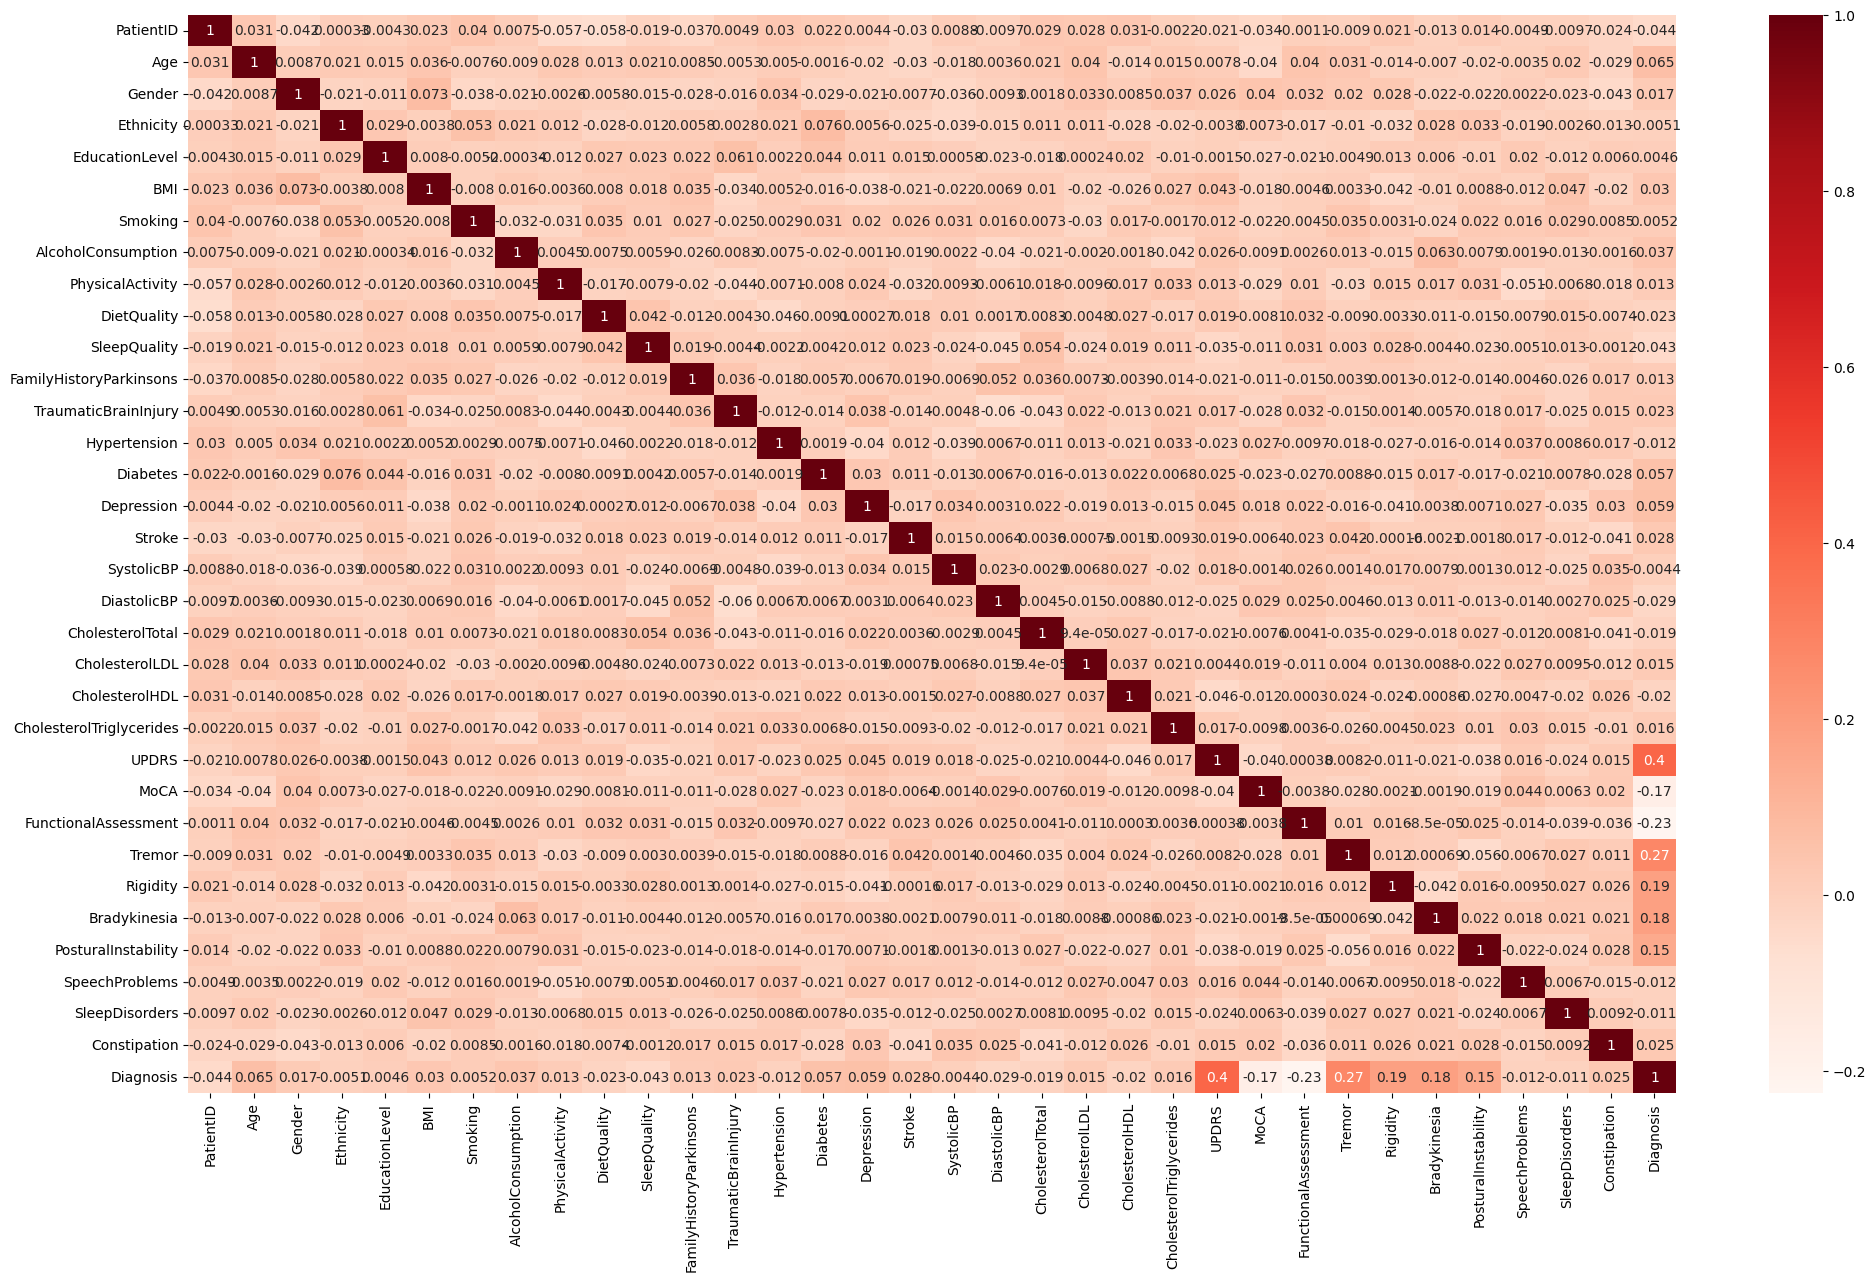

In [13]:
matriz_correlacao = dataset.corr()
plt.figure(figsize=(24,14))
sns.heatmap(matriz_correlacao, annot=True, cmap=plt.cm.Reds)
plt.show()

Após verificar a matriz de correlação , iremos selecionar somente as colunas que possuem maior correlação com a coluna alvo (Diagnosis):

In [14]:
cor_target = abs(matriz_correlacao["Diagnosis"])
relevant_features = cor_target[cor_target>0.1]
relevant_features_list = relevant_features.index.tolist()
print(relevant_features_list)


['UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'Diagnosis']


Agora iremos separar as colunas que contém as características da coluna alvo (Diagnosis):

In [15]:
x = dataset[relevant_features_list].drop('Diagnosis', axis=1)
y = dataset['Diagnosis']

print(x)
print(y)

           UPDRS       MoCA  FunctionalAssessment  Tremor  Rigidity  \
0       6.458713  29.181289              1.572427       1         0   
1      37.306703  12.332639              4.787551       0         1   
2      67.838170  29.927783              2.130686       1         0   
3      52.964696  21.304268              3.391288       1         1   
4      21.804880   8.336364              3.200969       0         0   
...          ...        ...                   ...     ...       ...   
2100  187.887925  28.634010              8.076254       1         0   
2101  172.325253  13.106537              1.665751       0         0   
2102  111.851581  26.527734              4.785614       0         0   
2103  144.474453  19.873404              8.378979       1         0   
2104   30.797680  12.192612              5.015131       0         0   

      Bradykinesia  PosturalInstability  
0                0                    0  
1                0                    1  
2                0   

Nesta etapa ,será realizada a padronização dos dados:

In [16]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

Agora iremos dividir os dados em conjuntos de treino e teste:

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

Com os dados devidamente divididos em conjuntos de treino e teste , será criado o modelo para que o mesmo seja treinado. O modelo escolhido foi o RandomForest  (Floresta Aleatória) :

In [20]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Para finalizar essa etapa , iremos avaliar o modelo selecionado:

In [22]:
y_pred = modelo.predict(x_test)
print("Acurácia do modelo:",accuracy_score(y_test, y_pred))
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.9382422802850356
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       160
           1       0.95      0.95      0.95       261

    accuracy                           0.94       421
   macro avg       0.94      0.93      0.93       421
weighted avg       0.94      0.94      0.94       421



## Criação , Avaliação e Seleção do melhor modelo para criar a Predição

Para iniciar esta  etapa será realizada a criação de 3 modelos de aprendizagem de máquina.

In [24]:
models = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42)
}

Agora será realizada a avaliação dos modelos:


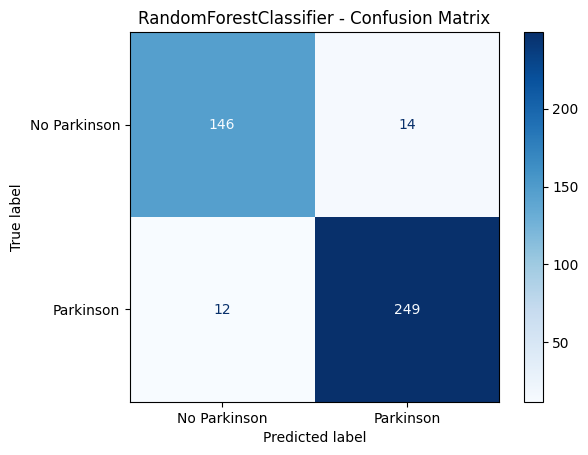

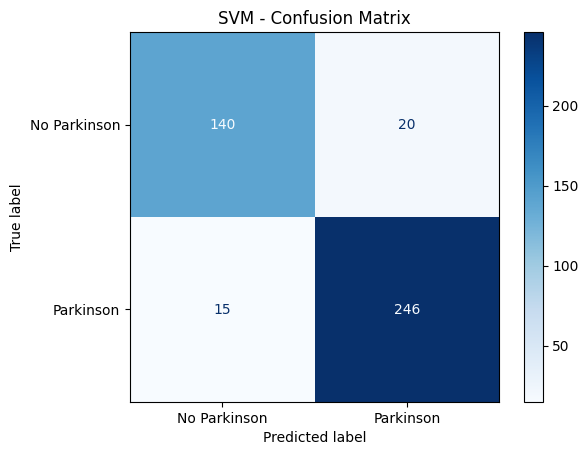

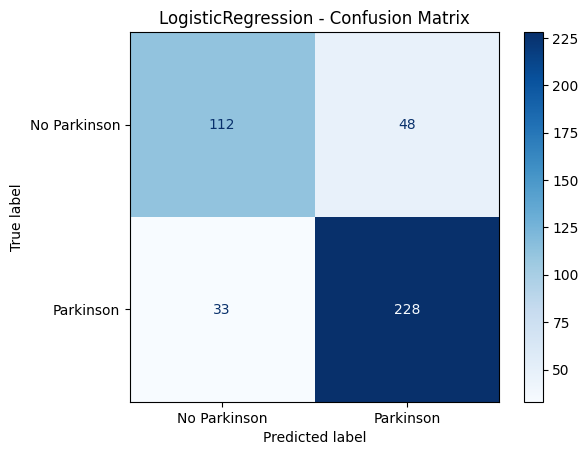

In [26]:
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

    # Exibição da matriz de confusão para análise
    disp = ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, display_labels=["No Parkinson", "Parkinson"], cmap=plt.cm.Blues)
    disp.ax_.set_title(f"{name} - Confusion Matrix")
    plt.show()

Em seguida , iremos realizar a comparação dos resultados de cada modelo:

In [27]:
results_dataset = pd.DataFrame(results).T
results_dataset

,Accuracy,Precision,Recall,F1 Score
RandomForestClassifier,0.938242,0.946768,0.954023,0.950382
SVM,0.916865,0.924812,0.942529,0.933586
LogisticRegression,0.807601,0.826087,0.873563,0.849162


Plotando o gráfico em barras para melhor visualização:

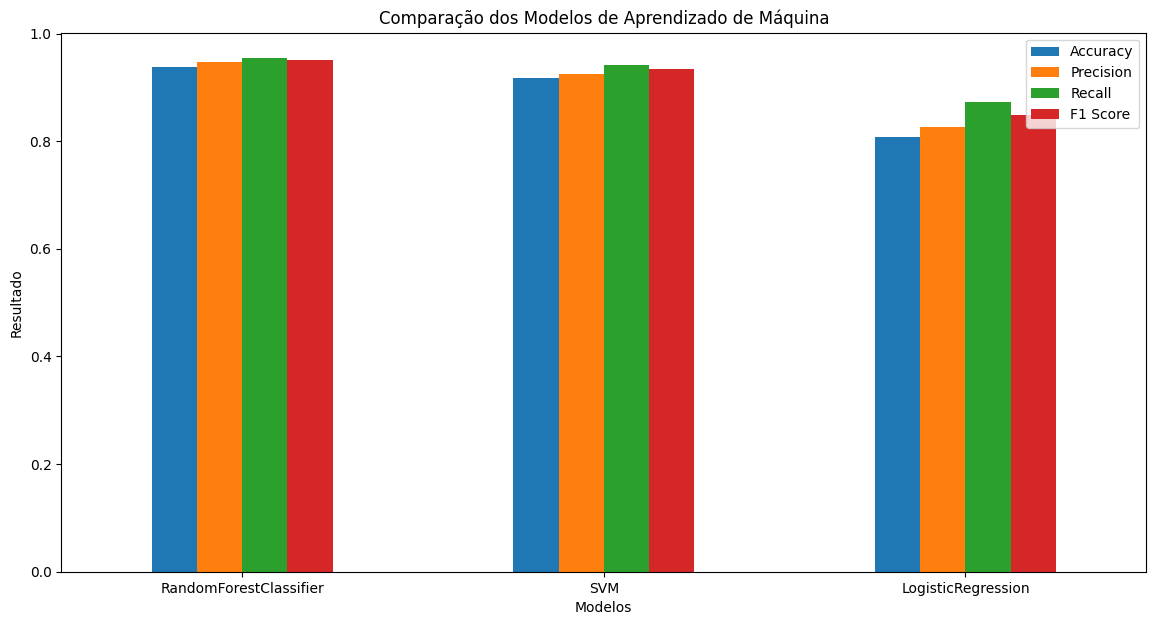

In [28]:
results_dataset.plot(kind='bar', figsize=(14,7))
plt.title('Comparação dos Modelos de Aprendizado de Máquina')
plt.xlabel('Modelos')
plt.ylabel('Resultado')
plt.xticks(rotation=0)
plt.show()

Neste momento iremos realizar a seleção do melhor modelo , utilizando como base a tabela o gráfico e o F1- Score:

In [31]:
melhor_modelo_nome = results_dataset['F1 Score'].idxmax()
melhor_modelo = models[melhor_modelo_nome]
print(f"O melhor modelo é: {melhor_modelo_nome}")

O melhor modelo é: RandomForestClassifier


Após selecionar o melhor modelo , iremos realizar a etapa de treinamento do mesmo:

In [32]:
melhor_modelo.fit(x, y)

RandomForestClassifier(random_state=42)

Para finalizar , será criada uma função de predição. Para testar a mesma , utilizaremos como exemplo os dados do primeiro paciente , assim teremos como comparar se o modelo está predizendo corretamente ou não :

In [41]:
def predicao_novo_paciente(model, scaler, new_data):
    new_data_scaled = scaler.transform([new_data])
    predicao = model.predict(new_data_scaled)
    return predicao

new_patient_data = x[0]
predicao = predicao_novo_paciente(melhor_modelo, scaler, new_patient_data)
print(f"A predição para o novo paciente é: {'Parkinson' if predicao[0] == 1 else 'No Parkinson'}")

A predição para o novo paciente é: No Parkinson


## Conclusão

O código desenvolvido aborda o diagnóstico da doença de Parkinson utilizando técnicas de machine learning, com três algoritmos principais: Random Forest, Support Vector Machine (SVM) e Regressão Logística. Inicialmente, os dados foram carregados e analisados, onde um mapa de correlação ajudou a identificar as características mais relevantes. As variáveis com maior correlação com a presença da doença foram selecionadas para o modelo. Após a padronização dos dados, que é essencial para algoritmos como SVM, os dados foram divididos em conjuntos de treino e teste para garantir uma avaliação imparcial do desempenho dos modelos.

Três modelos foram treinados e avaliados usando métricas como accuracy, precision, recall e F1-score. A matriz de confusão foi utilizada para visualizar o desempenho de cada modelo em termos de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos. Os resultados mostraram que o Random Forest apresentou o melhor desempenho em termos de F1-score, indicando um bom equilíbrio entre precisão e recall, crucial em diagnósticos médicos onde tanto falsos positivos quanto falsos negativos devem ser minimizados.

Os resultados foram comparados visualmente através de gráficos, o que facilitou a identificação do melhor modelo. O modelo Random Forest, sendo o mais eficaz, foi então treinado com todo o dataset e utilizado para prever novas entradas. Esta abordagem mostra a importância do pré-processamento de dados, seleção de características e uso de métricas adequadas para garantir a construção de um modelo robusto. A escolha do modelo com base no F1-score reflete a necessidade de um desempenho equilibrado, essencial para aplicações críticas como a detecção da doença de Parkinson. Este projeto demonstra como o uso de técnicas de machine learning pode ser instrumental no apoio a diagnósticos médicos, oferecendo uma ferramenta adicional para profissionais de saúde.